#### fsh mni

In [35]:
'''
2024.05.26
LeNet-5 with fashion mnist dataset
Hyejeong noh
'''

# library
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# load data
fashion_mnist = tf.keras.datasets.fashion_mnist

# divide data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# add dimension
train_images = train_images[..., tf.newaxis].astype("float32")
test_images = test_images[..., tf.newaxis].astype("float32")

# set names of label
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [36]:
# get info of shape of data
print('train images shape: ', train_images.shape)
print('test images shape: ', test_images.shape)

print('a image shape: ', train_images[0].shape)

print('train labels shape: ', train_labels.shape)
print('test labels shape: ', test_labels.shape)

train images shape:  (60000, 28, 28, 1)
test images shape:  (10000, 28, 28, 1)
a image shape:  (28, 28, 1)
train labels shape:  (60000,)
test labels shape:  (10000,)


In [37]:
# normalize
train_images, test_images = train_images / 255.0, test_images / 255.0

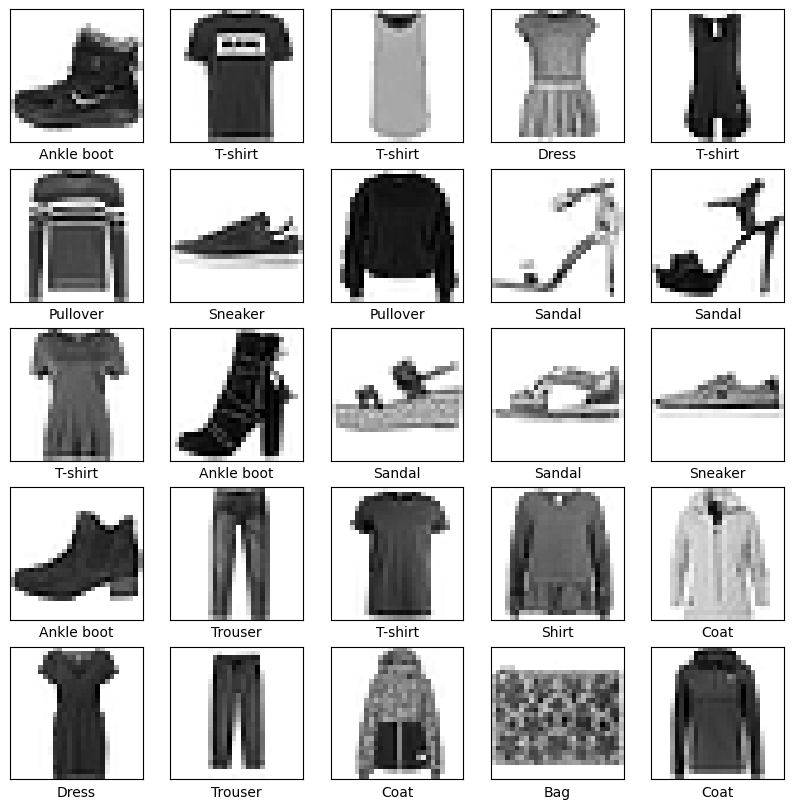

In [38]:
# visualize sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [39]:
# create model
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (3,3), padding='same', activation='relu',
                           input_shape=(28,28,1)), #C1
    tf.keras.layers.AvgPool2D((2,2), strides=2), #S2

    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'), #C3
    tf.keras.layers.AvgPool2D((2,2), strides=2), #S4
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'), #C5
    tf.keras.layers.Dense(84, activation='relu'), #F6
    tf.keras.layers.Dense(10, activation='softmax') #Output layer
])

In [40]:
# summary of model
model_with_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         60        
                                                                 
 average_pooling2d_4 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        880       
                                                                 
 average_pooling2d_5 (Avera  (None, 7, 7, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [42]:
# compile model
model_with_conv.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
# fit model
hist = model_with_conv.fit(train_images, train_labels, epochs=12, batch_size=32, validation_split=0.25)

Epoch 1/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2189 - accuracy: 0.9183 - val_loss: 0.2661 - val_accuracy: 0.9028
Epoch 2/12
1407/1407 [==============================] - 8s 5ms/step - loss: 0.2031 - accuracy: 0.9231 - val_loss: 0.2655 - val_accuracy: 0.9043
Epoch 3/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1881 - accuracy: 0.9297 - val_loss: 0.2517 - val_accuracy: 0.9105
Epoch 4/12
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1791 - accuracy: 0.9328 - val_loss: 0.2520 - val_accuracy: 0.9119
Epoch 5/12
1407/1407 [==============================] - 6s 5ms/step - loss: 0.1687 - accuracy: 0.9360 - val_loss: 0.2629 - val_accuracy: 0.9114
Epoch 6/12
1407/1407 [==============================] - 8s 5ms/step - loss: 0.1612 - accuracy: 0.9395 - val_loss: 0.2559 - val_accuracy: 0.9083
Epoch 7/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1504 - accuracy: 0.9426 - val_loss: 0.2666 - val_accuracy:

In [52]:
# evaluate
test_loss, test_acc = model_with_conv.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc, 'Test loss', test_loss)

313/313 - 1s - loss: 0.3263 - accuracy: 0.9108 - 845ms/epoch - 3ms/step

Test accuracy: 0.9107999801635742 Test loss 0.32626718282699585


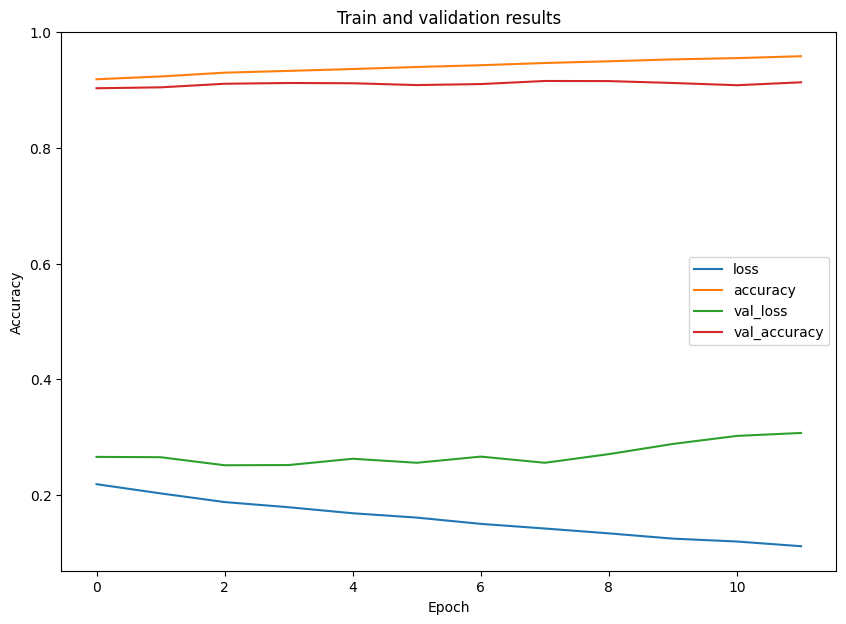

In [53]:
import pandas as pd

# draw accu and loss of train and vali data
pd.DataFrame(hist.history).plot(title="Train and validation results", xlabel='Epoch', ylabel='Accuracy', figsize=(10,7));

In [64]:
# predict
predictions = model_with_conv.predict(test_images)

313/313 [==============================] - 1s 2ms/step
predict single:  9


In [65]:
# expect random single data
print('predict single value: ', np.argmax(predictions[0]))
print('true single value == label: ', test_labels[0])

predict single value:  9
true single value == label:  9


In [67]:
probability = predictions.argmax(axis=1)

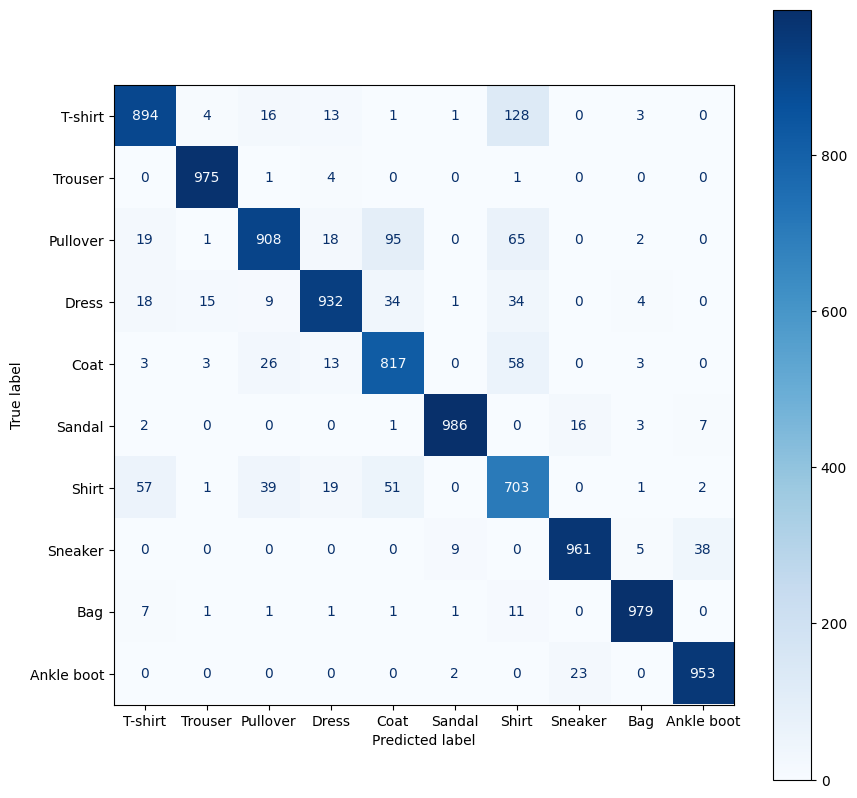

In [82]:
from sklearn import metrics

# draw confusion matrix
cm = metrics.confusion_matrix(probability, test_labels)

cmap = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)
fig, ax = plt.subplots(figsize = (10,10))
cmap.plot(ax = ax, cmap=plt.cm.Blues)

In [17]:
# define functions of predict - image
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# define functions of predict - bar
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

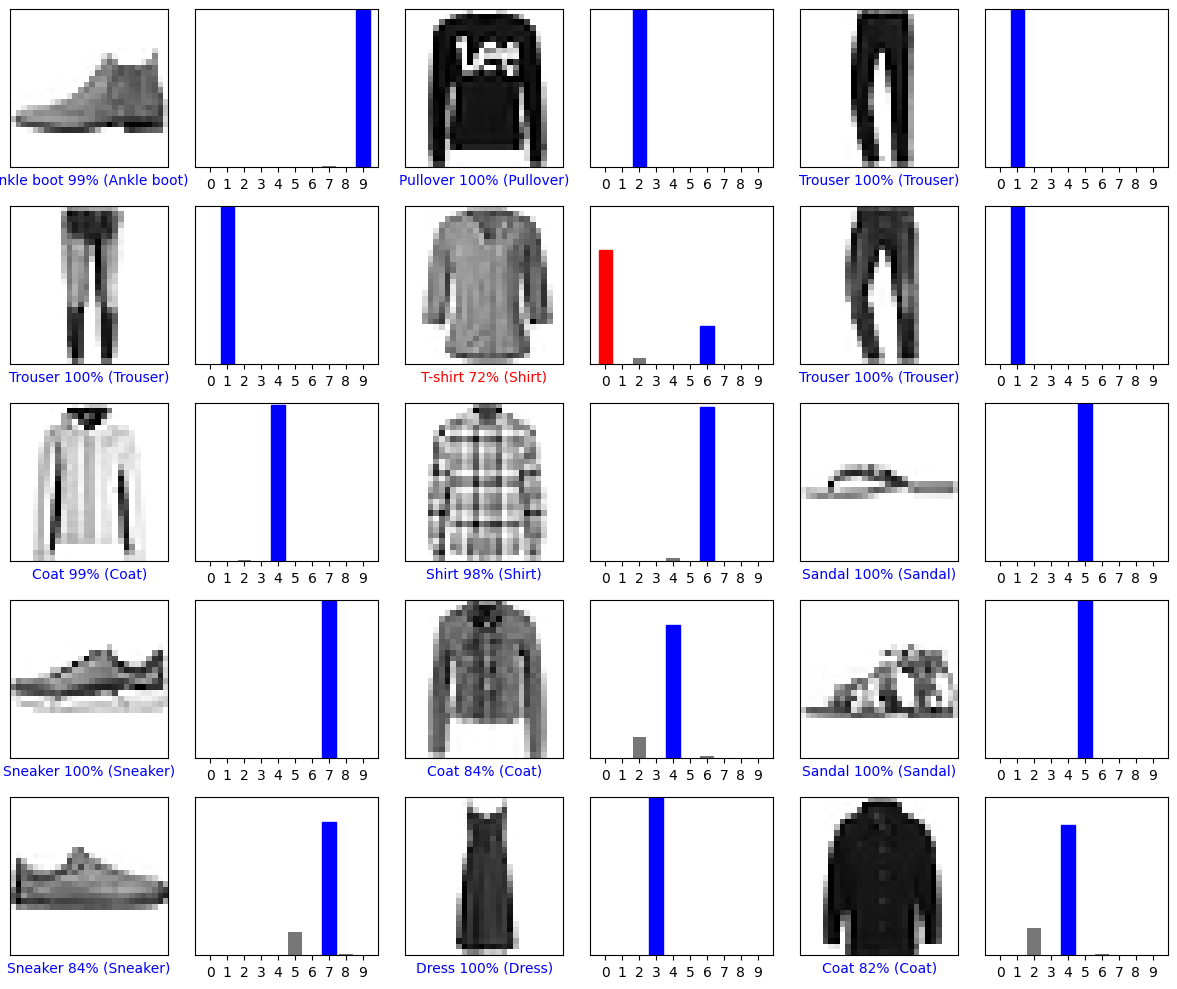

In [18]:
# use two func to predict random bunch of images
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()